# Book Recommendation System - EDA

by: [Yachi Darji](https://www.linkedin.com/in/yachi-darji/)

Recommendation system now become an essential part of many internet platforms, like Netflix, YouTube, Amazon, etc. A recommendation system uses several algorithms to filter the data and makes the most relevant recommendations to users. The Recommendation System was originally used in 1979 in a program called Grundy, a computer-based librarian that suggested books for users to read. In this project, I tried to make a book recommendation system based on data from the Goodreads application. Goodreads is a social networking site that specializes in cataloging books. Goodreads was established with the goal of igniting interest in reading.


### Problem Statement

Goal:
Design book recommendation system by several methods and explore the strengths and weaknesses of each method.

1. How can we calculate similarity in two books? how to apply it to a recommendation engine?
2. How to predict rating for the book that user will give and haven't read by them?
3. Compare all methods with eachother. Overcome weakness.

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

### About Data

The dataset was scraped from Goodreads API in September 2017 by Zygmunt Zając. 
This dataset consists of 5 files:

* rating.csv: contains user ratings for books they read
* book_enriched.csv: contains metadata for each book(book ID, title,author, pages etc)
* book_tag.csv: contains tags/shelves/genres assigned by users to books
* tag.csv: contains the tag names corresponding to tag IDs in book_tag.csv

Here, I will use rating.csv and the metadata of books.

In [5]:
ratings=pd.read_csv("C:/Users/yachi/final/myproject/Data/ratings.csv")

book=pd.read_csv("C:/Users/yachi/final/myproject/Data/books_enriched.csv")

### 1. Rating

In [6]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


* user_id: user identification number
* book_id: book identification number
* rating: rating given by user_id

In [7]:
ratings.shape

(5976479, 3)

In [8]:
for i in ratings.columns:
    print(f'NUMBER OF {i} is {ratings[i].nunique()}')

NUMBER OF user_id is 53424
NUMBER OF book_id is 10000
NUMBER OF rating is 5


There are 5976479 ratings given by 53424 unique user on 10000 books. 

### 2.Books

In [9]:
book.shape

(10000, 30)

In [10]:
book.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
index,0,1,2,3,4
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer'],['Harper Lee'],['F. Scott Fitzgerald']
average_rating,4.34,4.44,3.57,4.25,3.89
best_book_id,2767052,3,41865,2657,4671
book_id,1,2,3,4,5
books_count,272,491,226,487,1356
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...,The unforgettable novel of a childhood in a sl...,Alternate Cover Edition ISBN: 0743273567 (ISBN...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction...","['classics', 'fiction', 'historical-fiction', ...","['classics', 'fiction', 'historical-fiction', ..."
goodreads_book_id,2767052,3,41865,2657,4671


In this dataset, there are 30 columns. However, after investigating them, there are several columns that are repeated. For example too many book_id columns, 2 title columns, 2 authors column, details of the number of reviews per rating for each book, etc. In order to make cleaner metadata, I will do data preprocessing.

**Columns in dataset b**:<br>
- Identification number related (`book_id`, `goodreads_book_id`, `best_book_id`, `work_id`, `isbn`, `isbn13`)
- Title related (`original_title`, `title`)
- Authors related (`authors`, `authors_2`)
- Publication year related (`original_publication_year`, `publishDate`: the publication date)
- Rating related (`average_rating`, `ratings_count`: number of review, `work_ratings_count`, `work_text_reviews_count`, `ratings_1`, `ratings_2`, `ratings_3`, `ratings_4`, `ratings_5`)
- Image Url (`image_url`, `small_image_url`)
- `books_count`: number of edition available
- `language_code`: abbreviated language tags for all books
- `genres`: the genre tags taken from the top shelves users have assigned to a book. Only the main Goodreads genres have been retained
- `pages`: the total page count
- `description`: a free text summarizing the book's content
- Others (`Unnamed: 0`, `index`)

### Statistical Summary

we can devide the columns to numerical columns and categorical columns then check statistics of data

In [11]:
#divide the columns to numerical and categorical value
nums = book.select_dtypes(include=[np.number]).columns
cats = book.select_dtypes(exclude=[np.number]).columns

In [12]:
for i in book.columns:
    print(f'NUMBER OF {i} is {book[i].nunique()}')

NUMBER OF Unnamed: 0 is 10000
NUMBER OF index is 8770
NUMBER OF authors is 5057
NUMBER OF average_rating is 184
NUMBER OF best_book_id is 10000
NUMBER OF book_id is 10000
NUMBER OF books_count is 597
NUMBER OF description is 9772
NUMBER OF genres is 4351
NUMBER OF goodreads_book_id is 10000
NUMBER OF image_url is 6669
NUMBER OF isbn is 9300
NUMBER OF isbn13 is 9153
NUMBER OF language_code is 41
NUMBER OF original_publication_year is 293
NUMBER OF original_title is 9274
NUMBER OF pages is 950
NUMBER OF publishDate is 4679
NUMBER OF ratings_1 is 2630
NUMBER OF ratings_2 is 4117
NUMBER OF ratings_3 is 6972
NUMBER OF ratings_4 is 7762
NUMBER OF ratings_5 is 8103
NUMBER OF ratings_count is 9003
NUMBER OF small_image_url is 6669
NUMBER OF title is 9964
NUMBER OF work_id is 10000
NUMBER OF work_ratings_count is 9053
NUMBER OF work_text_reviews_count is 4581
NUMBER OF authors_2 is 5057


In [13]:
book[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


- The most popular author is Stephen King
- Selected Poems appears 4 times. Is it the same book?
- Because we already has `original_publication_year`, `publishDate` will be dropped
- `authors`, `genres`, `publishDate`, and `authors_2` has unnecessary characters

In [14]:
# List of not unique value columns.
not_unique=['average_rating', 'books_count', 'original_publication_year', 'pages', 
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count', 
                    'work_ratings_count', 'work_text_reviews_count']

### Univariate Analysis

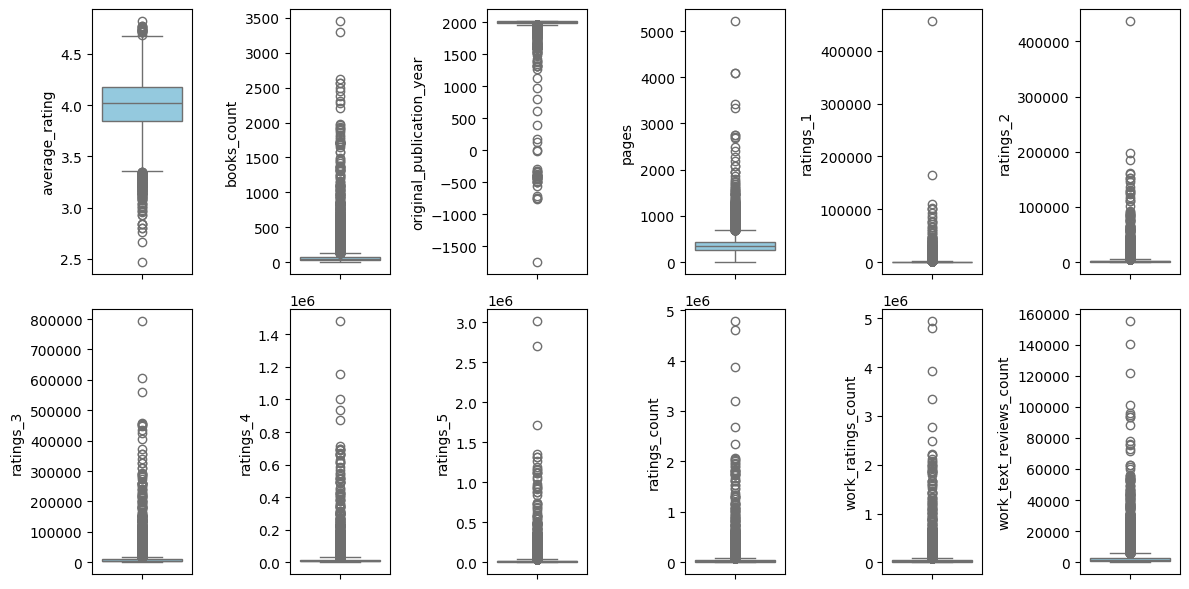

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = not_unique
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=book[features[i]], color='skyblue')
    plt.tight_layout()

The data varies greatly, so there is no need to clean the outliers. 


### Data Preprocessing

#### Missing value and Duplicated Rows

In [16]:
data=[book,ratings]
for i in data:
    print(i.isnull().values.any())

True
False


In [17]:
data=[book,ratings]
for i in data:
    print(i.duplicated().values.any())

False
False


There's no duplicate row in both data but we need to check missing value in book metadata

In [18]:
b=book.copy()

In [19]:
percent_missing=book.isnull().sum()*100/len(b)
missing_value=(pd.DataFrame({'percent_missing':percent_missing})).sort_values(by=['percent_missing'],ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
isbn,7.00
original_title,5.85
isbn13,5.85
pages,0.73
description,0.57
original_publication_year,0.21
publishDate,0.08


* Impute `pages` with median.
* Impute `original_publication_year` using `publishDate` .
* Impute `description` using book's title.
* Drop `isbn13`,`isbn`,`original_title`, there's no need to impute this

In [20]:
b[b['original_publication_year'].isnull()][['original_publication_year','publishDate']]

,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


* Get Year from `publishDate` and impute into `original_publication_year`

In [21]:
b['publishDate'].replace(r"[(')]","",regex=True,inplace=True)
b['publishDate']=b['publishDate'].str.extract('(\d{4})$').fillna('')

b['description']=b['description'].fillna(b['title'])

In [22]:
b['original_publication_year']=b['original_publication_year'].fillna(b['publishDate'])

In [23]:
b['year']=(b['original_publication_year']).astype(int)

In [24]:
b.drop('original_publication_year',axis=1,inplace=True)

In [25]:
# impute meadian values in page column

b['pages']=b['pages'].fillna(b['pages'].median())

In [26]:
#drop unnecessary cols
b=b.drop(['isbn','isbn13','original_title','publishDate'],axis=1)

In [27]:
b.isnull().values.any()

False

* Now we have no missing values 

### Feature engineering

In [28]:
# keeping important cols and drop rest ones.

imp=['small_image_url','book_id','title','authors','year','pages','description','genres','average_rating','ratings_count','books_count']
b=b[imp]

In [29]:
# Now display data column width to maximum.

with pd.option_context('display.max_colwidth',None):
    display(b.head())

,small_image_url,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
0,https://images.gr-assets.com/books/1447303603s/2767052.jpg,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008,374.0,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,https://images.gr-assets.com/books/1474154022s/3.jpg,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997,309.0,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,https://images.gr-assets.com/books/1361039443s/41865.jpg,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005,501.0,"About three things I was absolutely positive.\r\n\r\nFirst, Edward was a vampire.\r\n\r\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\r\n\r\nAnd third, I was unconditionally and irrevocably in love with him.\r\n\r\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,https://images.gr-assets.com/books/1361975680s/2657.jpg,4,To Kill a Mockingbird,['Harper Lee'],1960,324.0,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and

In [30]:

with pd.option_context('display.max_colwidth',None):
    display(b.head())

,small_image_url,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
0,https://images.gr-assets.com/books/1447303603s/2767052.jpg,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008,374.0,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,https://images.gr-assets.com/books/1474154022s/3.jpg,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997,309.0,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,https://images.gr-assets.com/books/1361039443s/41865.jpg,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005,501.0,"About three things I was absolutely positive.\r\n\r\nFirst, Edward was a vampire.\r\n\r\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\r\n\r\nAnd third, I was unconditionally and irrevocably in love with him.\r\n\r\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,https://images.gr-assets.com/books/1361975680s/2657.jpg,4,To Kill a Mockingbird,['Harper Lee'],1960,324.0,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and

* in our top rows we reported some unnecessary characters which arent supposed be in `description`column. we delete that characters and make all fonts in lowercase.

In [31]:
cols_trans=['authors','genres','description']
for i in cols_trans:
    b[i].replace(r"[\[\]\-\\\/\"—'()|:)]","",regex=True,inplace=True)
b['description'].replace({"\n":" ","isbn13" :"","isbn":"",r"[.,]":""},regex=True,inplace=True)
b['description']=b['description'].str.lower()
b['title']=b['title'].str.lower()

In [32]:
with pd.option_context('display.max_colwidth', None):
    display(b.sample(3))

,small_image_url,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
7620,https://s.gr-assets.com/assets/nophoto/book/50x75-a91bf249278a81aabab721ef782c4a74.png,9173,"the twentieth wife (taj mahal trilogy, #1)",Indu Sundaresan,2002,380.0,an enchanting seventeenthcentury epic of grand passion and adventure this debut novel tells the captivating story of one of indias most legendary and controversial empresses a woman whose brilliance and determination trumped myriad obstacles and whose love shaped the course of the mughal empireshe came into the world in the year 1577 to the howling accompaniment of a ferocious winter storm as the daughter of starving refugees fleeing violent persecution in persia her fateful birth in a roadside tent sparked a miraculous reversal of family fortune culminating in her fathers introduction to the court of emperor akbar she is called mehrunnisa the sun of women this is her storygrowing up on the fringes of emperor akbars opulent palace grounds mehrunnisa blossoms into a sapphireeyed child blessed with a precocious intelligence luminous beauty and a powerful ambition far surpassing the bounds of her familys station mehrunnisa first encounters young prince salim on his wedding day in that instant even as a royal gala swirls around her in celebration of the future emperors first marriage mehrunnisa foresees the path of her own destiny one day she decides with uncompromising surety she too will become salims wife she is all of eight years old and wholly unaware of the great price she and her family will pay for this dreamskillfully blending the textures of historical reality with the rich and sensuous imaginings of a timeless fairy tale the twentieth wife sweeps readers up in the emotional pageant of salim and mehrunnisas embattled love firsttime novelist indu sundaresan charts her heroines enthralling journey across the years from an illfated first marriage through motherhood and into a dangerous maze of power struggles and political machinations through it all mehrunnisa and salim long with fiery intensity for the true redemptive love theyve never known and their mutual quest ultimately takes them and the vast empire that hangs in the balance to places they never dreamed possibleshot through with wonder and suspense the twentieth wife is at once a fascinating portrait of one womans conventiondefying life behind the veil and a transporting saga of the astonishing potency of love,"historicalfiction, fiction, romance",4.03,9873,37
2506,https://images.gr-assets.com/books/1327886166s/187811.jpg,2684,"shadowland (the mediator, #1)",Meg Cabot,2000,287.0,suze is a mediator a liaison between the living and the dead in other words she sees dead people and they wont leave her alone until she helps them resolve their unfinished business with the living but jesse the hot ghost haunting her bedroom doesnt seem to need her help which is a relief because suze has just moved to sunny california and plans to start fresh with trips to the mall instead of the cemetery and surfing instead of spectral visitations but the very first day at her new school suze realizes its not that easy theres a ghost with revenge on her mind and suze happens to be in the way,"youngadult, fantasy, paranormal, romance, fiction, mystery, chicklit",4.04,51580,58
6563,https://images.gr-assets.com/books/1406513762s/11430.jpg,7654,"return (redemption, #3)","Karen Kingsbury, Gary Smalley",2003,384.0,the redemption series won christian retailing’s 2005 retailer’s choice award for best series! this touching novel reunites readers with the baxter family and focuses on the only baxter son luke he is determined to leave his faith and his past behind and embrace a new freethinking future but what he doesn’t realize is that his past holds a secret even he doesn’t know when luke finds out his comfortable new life is turned upside down and he must turn back to his roots,"christian, fiction, romance",4.44,11737,30


### EDA Question

#### 1. Distribution of ratings

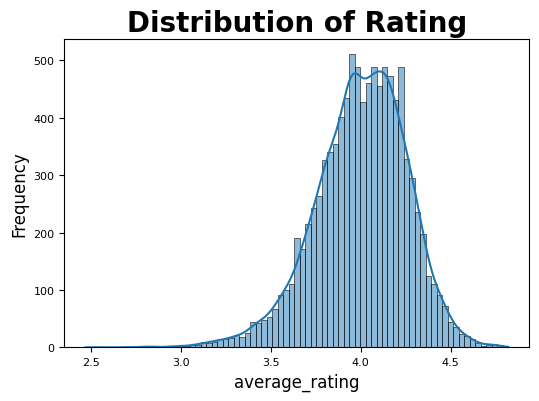

In [34]:
#Rating distribution based on books
plt.figure(figsize=(6,4))
sns.histplot(b['average_rating'],kde=True)
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('average_rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.savefig('rating.png', dpi=600, bbox_inches="tight", format='png')
plt.show()



# Frequency for this

In [32]:
b.describe()

,book_id,year,pages,average_rating,ratings_count,books_count
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,1982.040200,359.248800,4.002191,5.400124e+04,75.712700
std,2886.89568,152.420793,216.165717,0.254427,1.573700e+05,170.470728
min,1.00000,-1750.000000,0.000000,2.470000,2.716000e+03,1.000000
25%,2500.75000,1990.000000,251.000000,3.850000,1.356875e+04,23.000000
50%,5000.50000,2004.000000,336.000000,4.020000,2.115550e+04,40.000000
75%,7500.25000,2011.000000,422.000000,4.180000,4.105350e+04,67.000000
max,10000.00000,2017.000000,5216.000000,4.820000,4.780653e+06,3455.000000


* we admit that average rating is 4

#### 2. average rating per user

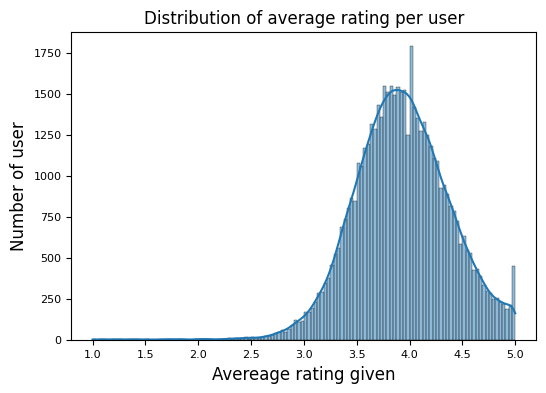

In [77]:
av_rating_user= ratings.groupby('user_id')['rating'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.histplot(data=av_rating_user,x='rating',kde=True)
plt.title("Distribution of average rating per user")
plt.xlabel("Avereage rating given",fontsize=12)
plt.ylabel("Number of user",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.savefig('ratingvscount.png', dpi=600, bbox_inches="tight", format='png')
plt.show()

#### 3. How many rating book usually get ?

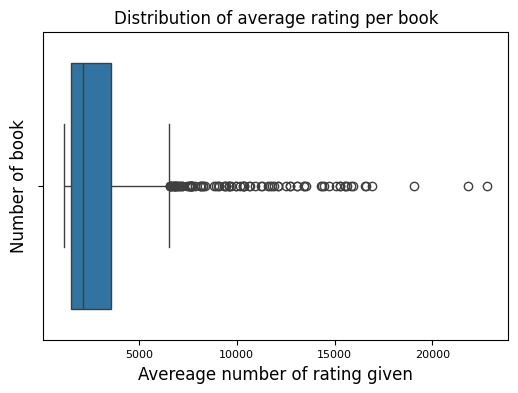

In [34]:
av_rating_book= (ratings.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating',ascending=False)

plt.figure(figsize=(6,4))
sns.boxplot(data=av_rating_book.head(1000),x='rating')
plt.title("Distribution of average rating per book")
plt.xlabel("Avereage number of rating given",fontsize=12)
plt.ylabel("Number of book",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()



In [35]:
av_rating_book['rating'].describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: rating, dtype: float64

Minimum review is 8 while popular books may have 22k reviews. Gap is too large.

In [36]:
q3, q1 = np.percentile(av_rating_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(av_rating_book[av_rating_book['rating'] > maximum])
print(f'We have {outlier_books} books that are considered outlier, because they have more than {int(maximum)} number of ratings')

We have 26 books that are considered outlier, because they have more than 12515 number of ratings


#### 4. How many ratings does user usually give?

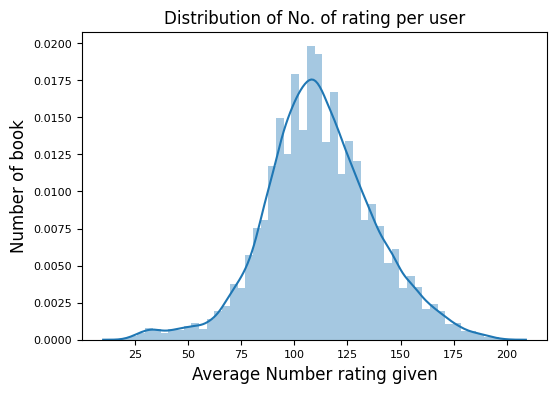

In [37]:
rating_per_user= (ratings.groupby('user_id')['rating'].count().reset_index()).sort_values(by='rating',ascending=False)

plt.figure(figsize=(6,4))
sns.distplot(rating_per_user['rating'])
plt.title("Distribution of No. of rating per user")
plt.xlabel("Average Number rating given",fontsize=12)
plt.ylabel("Number of book",fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

rating_per_user.to_csv('rating_per_user.csv')


In [38]:
rating_per_user['rating'].describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: rating, dtype: float64

At most people review 200 books and at least 19 books. The average person gives a review of 111 books. From 10,000 books in our dataset, even the user with the highest number of reviews managed to give a rating to only 2% of all of the books. Data in user is very sparse, so it will be better to use item-based collaborative filtering.

I also checked which user has the most reviews. I will use their user_id to test the recommendations.

In [39]:
rating_per_user[rating_per_user['rating'] == rating_per_user['rating'].max()]['user_id'].values

array([30944, 12874], dtype=int64)

#### 5. Does the rating count affect average rating?

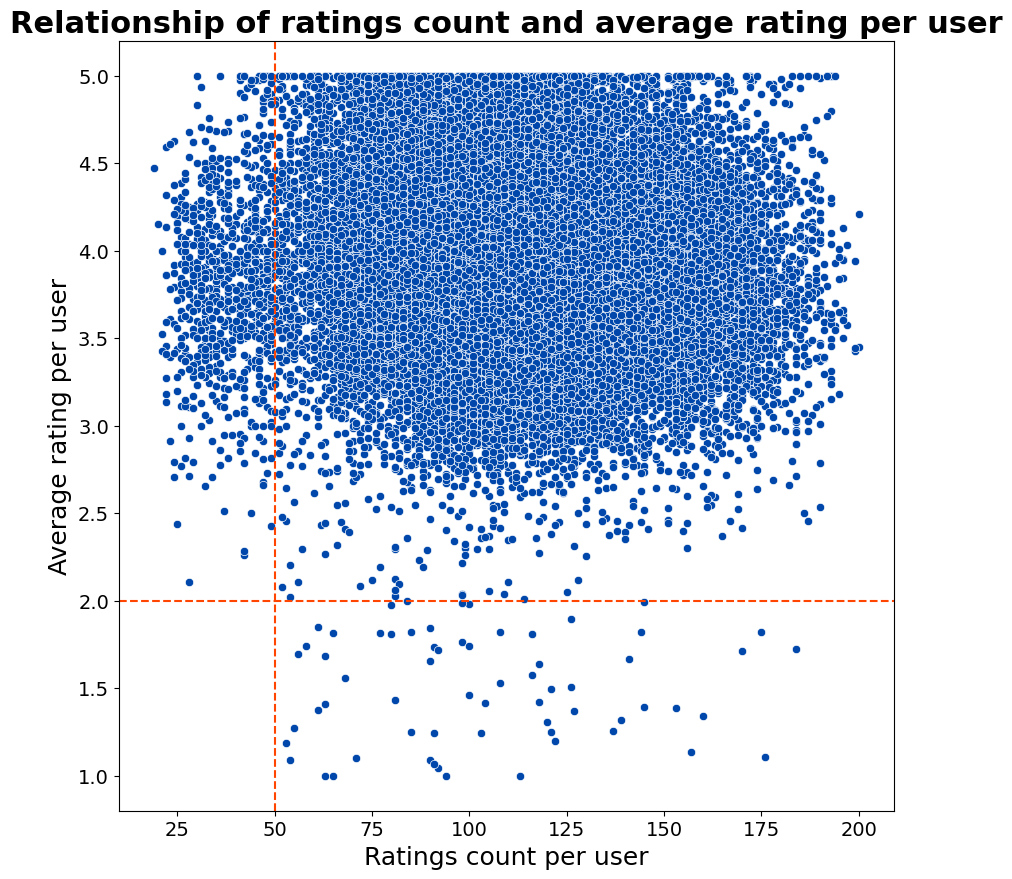

In [76]:
# merge average rating and number of ratings for each sampeld individual
id_merged = av_rating_user.merge(rating_per_user, left_on="user_id", right_on="user_id")

#visualize
plt.figure(figsize=(10,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Relationship of ratings count and average rating per user', weight='bold', fontsize=22)
plt.xlabel('Ratings count per user', fontsize=18)
plt.ylabel('Average rating per user', fontsize=18)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 
            50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('ratingvscount.png', dpi=600, bbox_inches="tight", format='png')
plt.show()
# id_merged.to_csv('id_merged.csv')


- People who rate < 50 books tend to give higher ratings. 
- People start to give lower rating if they read more books. 
- This could be a result of an inappropriate book recommendation system, so that people end up reading books they don't like.

#### 6.Top - Rated books

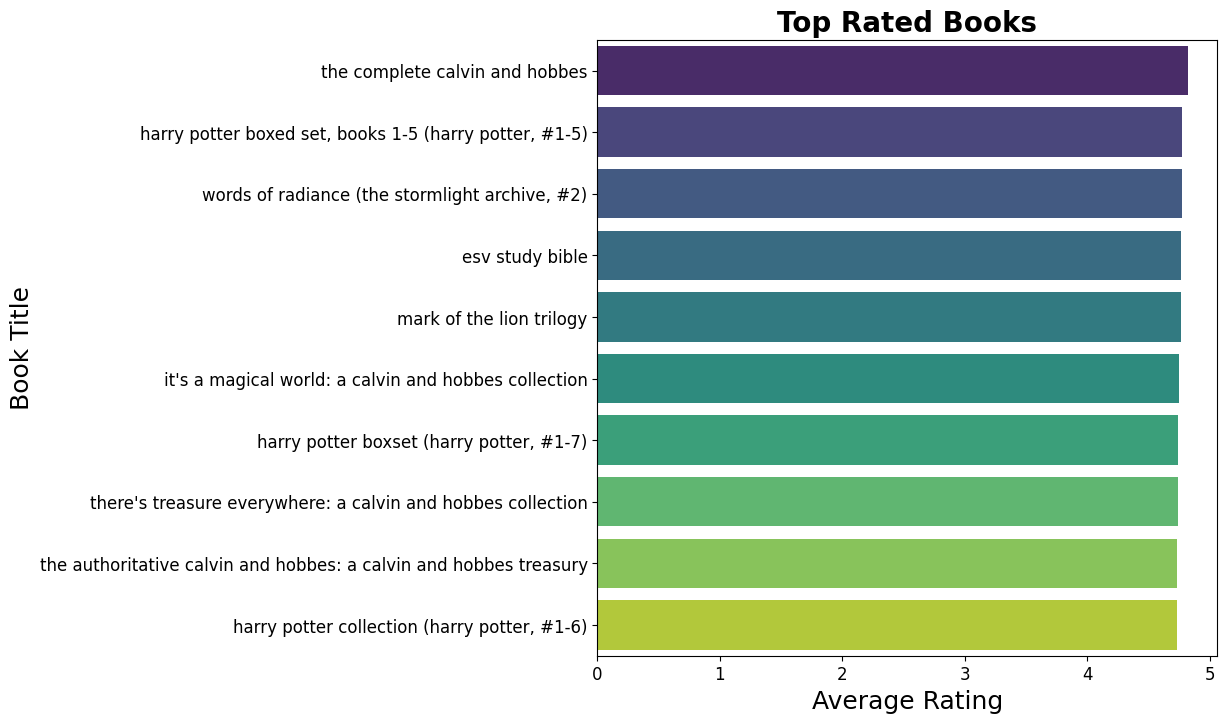

In [73]:

# Top rated books
top_rated_books = b.sort_values(by='average_rating', ascending=False).head(10)

# Visualize it using barplot
plt.figure(figsize=(8, 8))
sns.barplot(data=top_rated_books, x='average_rating', y='title', palette='viridis')
plt.title('Top Rated Books', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=18)
plt.ylabel('Book Title', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('topRatedbg.png', dpi=600, bbox_inches="tight", format='png')
plt.show()
# top_rated_books.to_csv('top_rated_books.csv')


#### 8 Author with most books

In [42]:


auth_book_count=b.groupby('authors')['title'].count().sort_values(ascending=False)
auth_book_count.head()



authors
Stephen King       60
Nora Roberts       59
Dean Koontz        46
Terry Pratchett    42
Agatha Christie    39
Name: title, dtype: int64

Based in simple count, author with most books is Stephen King. However, in fact there are books written by more than one author, right?. So let's check them.

In [43]:
#Stephen King as an example

auth=[]
b.authors.apply(lambda x: auth.append(x) if 'Stephen King'in x else [])
auth

['Stephen King',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King, Marie Milpois',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Richard Bachman, Stephen King',
 'Stephen King, Ned Dameron',
 'Stephen King',
 'Stephen King',
 'Stephen King, Dave McKean',
 'Stephen King, William Olivier Desmond',
 'Stephen King, John D. MacDonald',
 'Stephen King',
 'Stephen King, Bettina Blanch Tyroller',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King, Darrel Anderson',
 'Stephen King, Dominique Dill',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King',
 'Stephen King, Peter Straub',
 'Stephen King',
 'Richard Bachman, Stephen King',
 'Stephen King, Jerry N. 

Actually there are more than 1 author for many books. which would not be included into total books written by author. so  i decided to pick only first author to simplyfy the process.

In [44]:
prev_Count=b.authors.value_counts()['Stephen King']
print(f"Number of books written by Stephen King was {len(auth)} not {prev_Count}")

Number of books written by Stephen King was 97 not 60


In [45]:
# split authors if they have multiple authors listed
a=[]
b.authors.apply(lambda x:a.append(x) if ','in x else [])
a

['J.K. Rowling, Mary GrandPré',
 'Anne Frank, Eleanor Roosevelt, B.M. MooyaartDoubleday',
 'Stieg Larsson, Reg Keeland',
 'J.K. Rowling, Mary GrandPré, Rufus Beck',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'J.K. Rowling, Mary GrandPré',
 'William Shakespeare, Robert           Jackson',
 'Charlotte Brontë, Michael Mason',
 'Mark Twain, John Seelye, Guy Cardwell',
 'E.B. White, Garth Williams, Rosemary Wells',
 'Emily Brontë, Richard J. Dunn',
 'Jane Austen, Tony Tanner, Ros Ballaster',
 'Louis Sachar, Louis Sachar',
 'Homer, Robert Fagles, E.V. Rieu, Frédéric Mugler, Bernard Knox',
 'Antoine de SaintExupéry, Richard Howard, Dom Marcos Barbosa, Melina Karakosta',
 'Charles Dickens, Richard Maxwell, Hablot Knight Browne',
 'Elie Wiesel, Marion Wiesel',
 'Steven D. Levitt, Stephen J. Dubner',
 'Gabriel García Márquez, Gregory Rabassa',
 'Oscar Wilde, Jeffrey Eugenides',
 'Bram Stoker, Nina Auerbach, Dav

In [46]:
authors_list = b['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
authors_list.head()

0                  Suzanne Collins
1    [J.K. Rowling, Mary GrandPré]
2                  Stephenie Meyer
3                       Harper Lee
4              F. Scott Fitzgerald
Name: authors, dtype: object

In [47]:
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'
splitted_authors.head()

0    Suzanne Collins
1       J.K. Rowling
1      Mary GrandPré
2    Stephenie Meyer
3         Harper Lee
Name: authors, dtype: object

In [48]:
#remove previous author column and join the new splitted authors
b = b.drop('authors', axis=1).join(splitted_authors)

In [49]:
# Take the first author for each book and remove the rest
b = b.drop_duplicates(subset='book_id', keep='first')

In [50]:
#author with most books
book_count_real = b['authors'].value_counts()
book_count_real.head()
book_count_real.to_csv('book_count_real.csv')

Now, instead of Stephen King, we found James Patterson is actually the author with the most books!

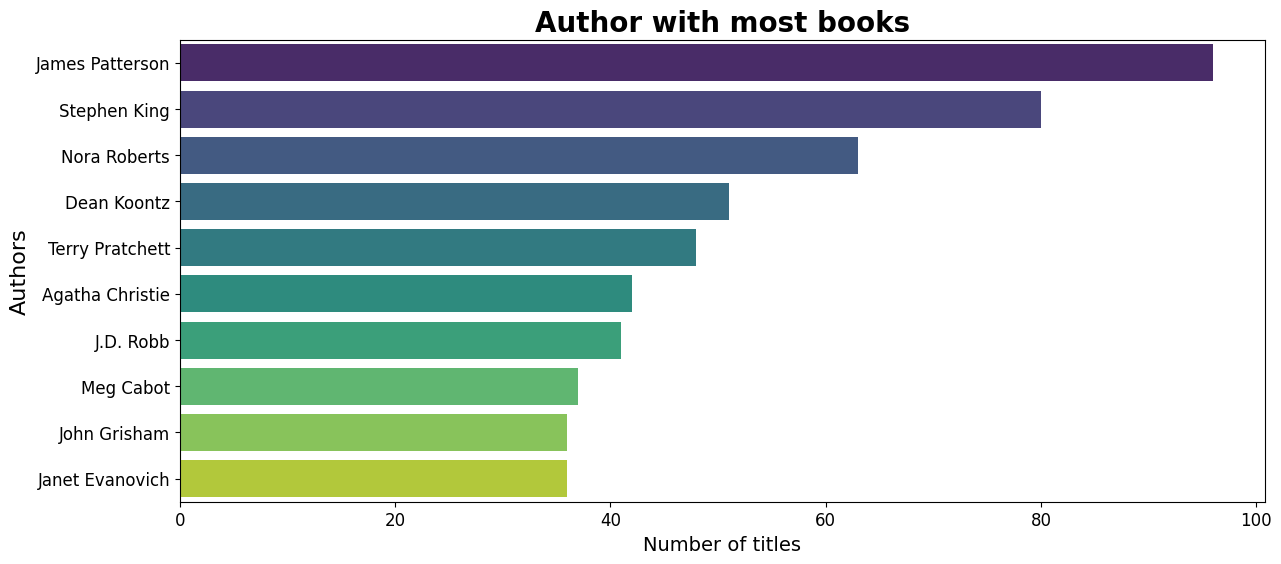

In [74]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values, 
            y=book_count_real.head(10).index,
           palette = 'viridis')
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('mostbookauthor.png', dpi=600, bbox_inches="tight", format='png')
plt.show()



#### 9. who's the most popular author? 

In [36]:
popular_author = b.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)
popular_author.to_csv('popular_author.csv')

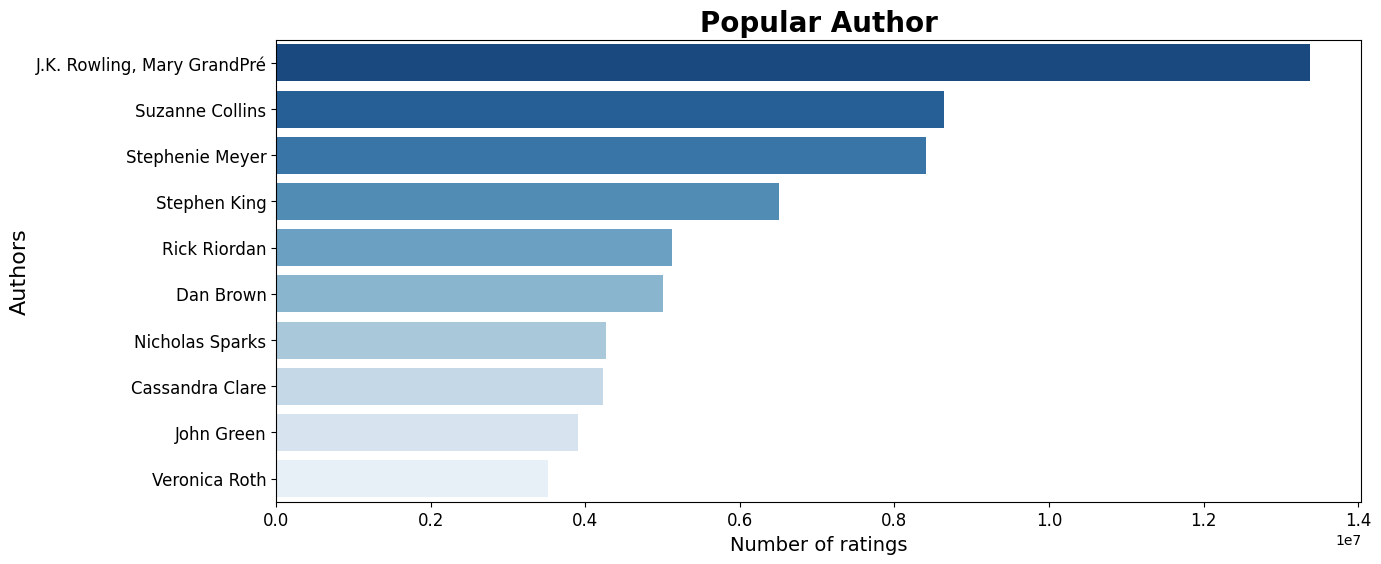

In [37]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values, 
            y=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('mostbookauthor.png', dpi=600, bbox_inches="tight", format='png')
plt.show()

In [54]:
b['authors'].value_counts()['J.K. Rowling']

20

Although James Patterson is the author with max boks but he's not the one who has the most ratings.
J.K Rowing is the most ratings author with his 20 books in dataset.

#### 10. author has good ratings book

In [55]:
# Let's check authors with biggest number of rates (total number for all books)
high_rating_author = b.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)
high_rating_author.to_csv('high_rated_author.csv')

#### 10. What Genre dominates the data?

In [56]:

g=[]
b.genres.apply(lambda x: g.append(x) if ','in x else [])
g[:6]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance',
 'youngadult, romance, fiction, contemporary']

In [57]:
#insert splitted genres list in every row
genres_list = b['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

0    [youngadult, fiction, fantasy, sciencefiction,...
1             [fantasy, fiction, youngadult, classics]
2    [youngadult, fantasy, romance, fiction, parano...
3    [classics, fiction, historicalfiction, youngad...
4      [classics, fiction, historicalfiction, romance]
Name: genres, dtype: object

In [58]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

0        youngadult
0           fiction
0           fantasy
0    sciencefiction
0           romance
Name: genres, dtype: object

In [59]:
#remove previous genre column and join the new splitted genre
book_genres = b.drop('genres', axis=1).join(splitted_genres)
book_genres.to_csv('book_genres.csv')

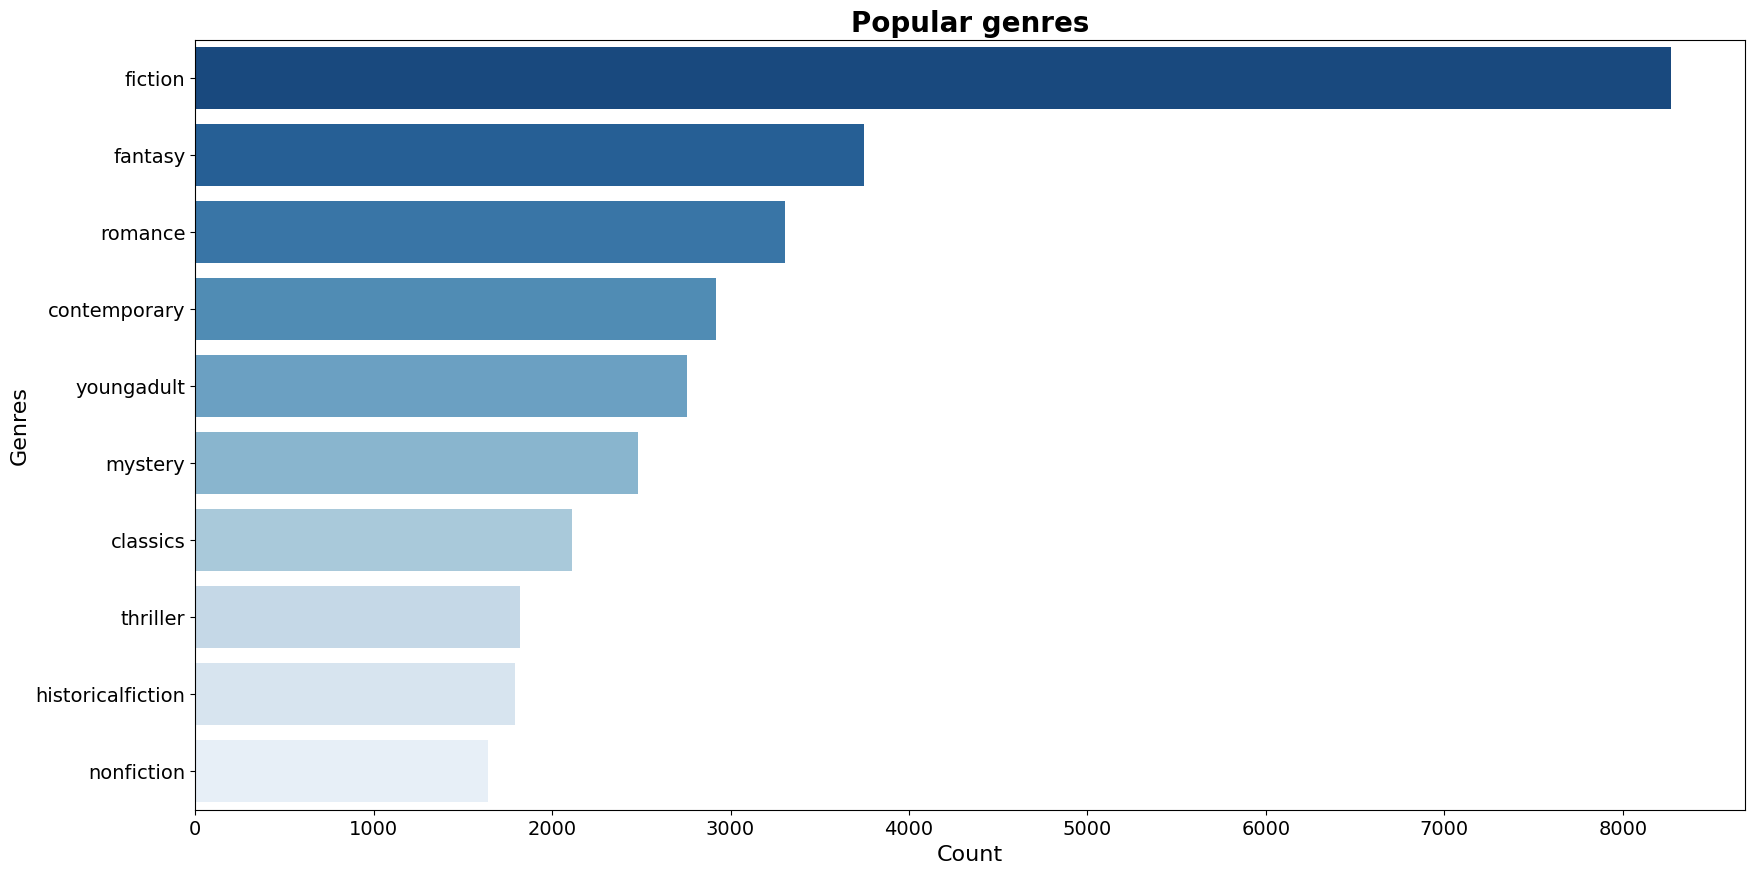

In [75]:
x = book_genres['genres']
y = book_genres['average_rating']
#rank the genre based on number of books
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('populargenres.png', dpi=600, bbox_inches="tight", format='png')
plt.show()


We can see that the majority (around 80%) of the books here are included in fiction books. The second rank goes to fantasy followed by romance. The difference between the first and second ranks is more than half. If you use a filtering method based on genre similarities, it is very unlikely that the engine will recommend non-fiction books.

#### Export Data

After making some changes to the data, we can now save our clean data and use it in the book recommendation system.

In [61]:
# b.to_csv('fInal_Data.csv')